# A Tutorial on Deep Learning, Neural Nets, CNN and a Tensor Flow implementation


### Get the Data: https://github.com/MarcusoHanlon/DeepLearning_TensorFlow


<img src="http://tensorflow.org/images/logo-alt@2x.png", width=300, height=300>


<img src="http://marketingmorsels.com/wp-content/uploads/2010/03/Number-Crunching.png", width=300, height=300>

#### TensorFlow is just a number-crunching library, much like Numpy is. 

#### The difference is, however, a package like TensorFlow allows us to perform specific machine learning number-crunching operations like derivatives on huge matricies with large efficiency. 

#### TensorFlow also allows us to easily distribute this processing across our CPU cores, GPU cores, or even multiple devices like multiple GPUs. 

#### We can even distribute computations across a distributed network of computers with TensorFlow.  

### TensorFlow setup

*Mac setup is alot easier than Windows Set-Up*

**Mac SetUp**  
    1. create a new tensorflow env
http://conda.pydata.org/docs/using/envs.html
    
    2. conda install tensorflow
    3. conda installipython and jupyter
    4. load up that environment and import tensorflow

If that doesn't work try pip installing this too: http://stackoverflow.com/questions/36046448/windows-7-jupyter-notebook-executing-tensorflow/37280604#37280604

**Windows Set-Up**  
https://pythonprogramming.net/installing-tensorflow-machine-learning-tutorial/?completed=/neural-networks-machine-learning-tutorial/

<img src="http://drpop.org/wp-content/uploads/2013/02/Step_Back.jpg", width=300, height=300>

Step back ya'll don't know Artificial Neural Networks like that

# A Quick Introduction to Neural Networks

An Artificial Neural Network (ANN) is a computational model that is inspired by the way biological neural networks in the human brain process information.  

**The Neuron**  
Each input has an associated weight (w), which is assigned on the basis of its relative importance to other inputs.
<img src="https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-09-at-3-42-21-am.png?w=1136&h=606", width=400, height=300>  

The above network takes numerical inputs X1 and X2 and has weights w1 and w2 associated with those inputs. Additionally, there is another input 1 with weight b (called the Bias) associated with it. The output Y from the neuron is computed as shown in the Figure 1. The function f is non-linear and is called the Activation Function. The purpose of the activation function is to introduce non-linearity into the output of a neuron. This is important because most real world data is non linear and we want neurons to learn these non linear representations.


**The Multi Layer Perceptron**
<img src="https://ujwlkarn.files.wordpress.com/2016/08/ds.png?w=1128", width=300, height=600> 

Allows for learning from non-linear data.  
Output layer is generally a softmax activation function: http://sebastianraschka.com/faq/docs/logisticregr-neuralnet.html

**How do they Learn**  
*Feed-forward back propogation*: weights are randomly assigned, cost-function is defined and search space algorithm selected. Back propogate to minimise cost-function



**More Reading**  
NN and CNN info: http://cs231n.github.io/  
CNN: https://www.youtube.com/watch?v=n6hpQwq7Inw  
NN -> CNN: http://neuralnetworksanddeeplearning.com/chap1.html<br/>
http://nbviewer.jupyter.org/github/pkmital/CADL/blob/master/session-2/lecture-2.ipynb


# Let's Code  

https://www.tensorflow.org/versions/master/tutorials/mnist/beginners/index.html#mnist-for-ml-beginners

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import tensorflow as tf

# settings
LEARNING_RATE = 1e-4
# set to 20000 on local environment to get 0.99 accuracy
TRAINING_ITERATIONS = 2500        
    
DROPOUT = 0.5
BATCH_SIZE = 50

# set to 0 to train on all available data
VALIDATION_SIZE = 2000

# image number to output
IMAGE_TO_DISPLAY = 10

# The Data - The MNIST Data Set

<img src="http://rodrigob.github.io/are_we_there_yet/build/images/mnist.png?1363085077", width=300, height=300>



In [2]:
# read training data from CSV file 
data = pd.read_csv('train.csv')

print('data({0[0]},{0[1]})'.format(data.shape))
data.head()

data(42000,785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Some preprocessing

In [3]:
#create the input data set
images = data.iloc[:,1:].values #index = iloc [everything:everything,1:everything]
images = images.astype(np.float)

# convert from [0:255] => [0.0:1.0]
images = np.multiply(images, 1.0 / 255.0)

print('images({0[0]},{0[1]})'.format(images.shape))

images(42000,784)


In [4]:
image_size = images.shape[1]
print ('image_size => {0}'.format(image_size))

# in this case all images are square
image_width = image_height = np.ceil(np.sqrt(image_size)).astype(np.uint8)

print ('image_width => {0}\nimage_height => {1}'.format(image_width,image_height))

image_size => 784
image_width => 28
image_height => 28


# Lets have a look

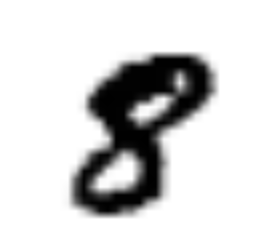

In [5]:
# display image
def display(img):
    
    # (784) => (28,28)
    one_image = img.reshape(image_width,image_height)
    
    plt.axis('off')
    plt.imshow(one_image, cmap=cm.binary)

# output image     
display(images[IMAGE_TO_DISPLAY])

In [6]:
data.label[IMAGE_TO_DISPLAY]

8

In [7]:
len(np.unique(data.label))

10

# Some more preprocessing

In [8]:
#create the output data set using one-hot encoding

labels_flat = data[[0]].values.ravel() #flatten column and return as array
labels_count = np.unique(labels_flat).shape[0]

# convert class labels from scalars to one-hot vectors
def dense_to_one_hot(labels_dense, num_classes):
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    return labels_one_hot

labels = dense_to_one_hot(labels_flat, labels_count)
labels = labels.astype(np.uint8)

print('labels({0[0]},{0[1]})'.format(labels.shape))
print ('labels[{0}] => {1}'.format(IMAGE_TO_DISPLAY,labels[IMAGE_TO_DISPLAY]))


labels(42000,10)
labels[10] => [0 0 0 0 0 0 0 0 1 0]


In [9]:
# split data into training & validation
validation_images = images[:VALIDATION_SIZE]
validation_labels = labels[:VALIDATION_SIZE]

train_images = images[VALIDATION_SIZE:]
train_labels = labels[VALIDATION_SIZE:]


print('train_images({0[0]},{0[1]})'.format(train_images.shape))
print('validation_images({0[0]},{0[1]})'.format(validation_images.shape))


train_images(40000,784)
validation_images(2000,784)




# The TensorFlow Building Block<br/> <br/> 

<img src="https://mi-od-live-s.legocdn.com/r/www/r/service/-/media/service/service%202015/buy%20bricks/buy-bricks-1.jpg?l.r2=1891272405", width=75, height=200> 

TensorFlow requries you to build your computational graph, ultimately we build the Neural Network ourselves allowing for great flexibiliy in its design. The key blocks are as follows:<br/> <br/> 
**1. Input Data Holders**<br/> 
**2. Weights**<br/> 
**3. Biases**<br/> 
**4. Dropout**<br/> 
**5. Output Layer**<br/> 
**6. Cost Function**<br/> <br/> 

We build up these blocks step by step and then using a technique known as batching to train our network.




# TensorFlow graph
TensorFlow does its heavy lifting outside Python. Therefore, instead of running every single operation independently, TensorFlow allows users to build a whole graph of interacting operations and then runs the workflow in a separate process at once.

Tensorflow relies on a highly efficient C++ backend to do its computation. The connection to this backend is called a session. The common usage for TensorFlow programs is to first create a graph and then launch it in a session.

Here we instead use the convenient InteractiveSession class, which makes TensorFlow more flexible about how you structure your code. It allows you to interleave operations which build a computation graph with ones that run the graph. This is particularly convenient when working in interactive contexts like IPython. If you are not using an InteractiveSession, then you should build the entire computation graph before starting a session and launching the graph.



### Our First Graph/Model/Neural Net or just logistic regrssion really

<img src="http://sebastianraschka.com/images/faq/logisticregr-neuralnet/schematic.png", width=600, height=600> 



In this section we will build a softmax regression model with a single linear layer. In the next section, we will extend this to the case of softmax regression with a multilayer convolutional network. <br/> <br/> 
Neural networks are somewhat related to logistic regression. Basically, we can think of logistic regression as a one layer neural network.  <br/> <br/> 
In fact, it is very common to use logistic sigmoid functions as activation functions in the hidden layer of a neural network – like the schematic above but without the threshold function.  <br/> <br/> 
http://sebastianraschka.com/faq/docs/logisticregr-neuralnet.html<br/> <br/> 
We start building the computation graph by creating nodes for the input images and target output classes.<br/> <br/> 


In [10]:
# images
x = tf.placeholder('float', shape=[None, image_size])
# labels
y_ = tf.placeholder('float', shape=[None, labels_count])

Here x and y_ are placeholders -- a value that we'll input when we ask TensorFlow to run a computation.<br/> <br/> 
**X = Input**<br/> 
The input images x will consist of a 2d tensor of floating point numbers. Here we assign it a shape of [None, 784], where 784 is the dimensionality of a single flattened MNIST image, and None indicates that the first dimension, corresponding to the batch size, can be of any size.<br/> <br/> 
**Y = Output**<br/> <br/> 
The target output classes y_ will also consist of a 2d tensor, where each row is a one-hot 10-dimensional vector indicating which digit class the corresponding MNIST image belongs to.
The shape argument to placeholder is optional, but it allows TensorFlow to automatically catch bugs stemming from inconsistent tensor shapes.<br/> <br/> 
We now define the weights W and biases b for our model. We could imagine treating these like additional inputs, but TensorFlow has an even better way to handle them: Variable. A Variable is a value that lives in TensorFlow's computation graph. It can be used and even modified by the computation. In machine learning applications, one generally has the model parameters be Variables.

In [11]:
# Weights and Biases
W = tf.Variable(tf.zeros([image_size,labels_count]))
b = tf.Variable(tf.zeros([labels_count]))

Weights are obvious, biases may not, check out this link for more info: http://stackoverflow.com/questions/2480650/role-of-bias-in-neural-networks<br/><br/>
Before Variables can be used within a session, they must be initialized using that session. This step takes the initial values (in this case tensors full of zeros) that have already been specified, and assigns them to each Variable. This can be done for all Variables at once.

Dropout address overfitting by dropping neurons : http://fastml.com/regularizing-neural-networks-with-dropout-and-with-dropconnect/

In [17]:
# dropout
keep_prob = tf.placeholder('float')

We can now implement our regression model. It only takes one line! We multiply the vectorized input images x by the weight matrix W, add the bias b, and compute the softmax probabilities that are assigned to each class.<br/><br/>
The cost function to be minimized during training can be specified just as easily. Our cost function will be the cross-entropy between the target and the model's prediction.

In [18]:
# create softmax function
y = tf.nn.softmax(tf.matmul(x,W) + b)

# create cost function to be minimised
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y)))

Define our optimisations algorithm and some of our evaluation formulas

In [19]:
# define algorithm to search solution space
train_step = tf.train.AdamOptimizer(LEARNING_RATE).minimize(cross_entropy)

# evaluation
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))


# prediction function
#[0.1, 0.9, 0.2, 0.1, 0.1 0.3, 0.5, 0.1, 0.2, 0.3] => 1
predict = tf.argmax(y,1)

**Altogether**

In [13]:

# input & output of NN
# images
x = tf.placeholder('float', shape=[None, image_size])
# labels
y_ = tf.placeholder('float', shape=[None, labels_count])

# Weights and Biases
W = tf.Variable(tf.zeros([image_size,labels_count]))
b = tf.Variable(tf.zeros([labels_count]))

# Initialise the weights/biases
#sess.close()
# start TensorFlow session
init = tf.initialize_all_variables()
sess = tf.InteractiveSession()

sess.run(init)
#sess.run(tf.initialize_all_variables())

# dropout
keep_prob = tf.placeholder('float')

# create softmax function
y = tf.nn.softmax(tf.matmul(x,W) + b)

# create cost function to be minimised
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y)))

# define algorithm to search solution space
train_step = tf.train.AdamOptimizer(LEARNING_RATE).minimize(cross_entropy)

# evaluation
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))



# prediction function
#[0.1, 0.9, 0.2, 0.1, 0.1 0.3, 0.5, 0.1, 0.2, 0.3] => 1
predict = tf.argmax(y,1)

# Define a batching process


In [14]:
epochs_completed = 0
index_in_epoch = 0
num_examples = train_images.shape[0]

# serve data by batches
def next_batch(batch_size):
    
    global train_images
    global train_labels
    global index_in_epoch
    global epochs_completed
    
    start = index_in_epoch
    index_in_epoch += batch_size
    
    # when all trainig data have been already used, it is reorder randomly    
    if index_in_epoch > num_examples:
        # finished epoch
        epochs_completed += 1
        # shuffle the data
        perm = np.arange(num_examples)
        np.random.shuffle(perm)
        train_images = train_images[perm]
        train_labels = train_labels[perm]
        # start next epoch
        start = 0
        index_in_epoch = batch_size
        assert batch_size <= num_examples
    end = index_in_epoch
    return train_images[start:end], train_labels[start:end]


In [15]:
sess.close()
# start TensorFlow session
init = tf.initialize_all_variables()
sess = tf.InteractiveSession()

sess.run(init)

In [75]:
# visualisation variables
train_accuracies = []
validation_accuracies = []
x_range = []

display_step=1

for i in range(TRAINING_ITERATIONS):

    #get new batch
    batch_xs, batch_ys = next_batch(BATCH_SIZE)        

    # check progress on every 1st,2nd,...,10th,20th,...,100th... step
    if i%display_step == 0 or (i+1) == TRAINING_ITERATIONS:
        
        train_accuracy = accuracy.eval(feed_dict={x:batch_xs, 
                                                  y_: batch_ys, 
                                                  keep_prob: 1.0})       
        if(VALIDATION_SIZE):
            validation_accuracy = accuracy.eval(feed_dict={ x: validation_images[0:BATCH_SIZE], 
                                                            y_: validation_labels[0:BATCH_SIZE], 
                                                            keep_prob: 1.0})                                  
            print('training_accuracy / validation_accuracy => %.2f / %.2f for step %d'%(train_accuracy, validation_accuracy, i))
            
            validation_accuracies.append(validation_accuracy)
            
        else:
             print('training_accuracy => %.4f for step %d'%(train_accuracy, i))
        train_accuracies.append(train_accuracy)
        x_range.append(i)
        
        # increase display_step
        if i%(display_step*10) == 0 and i:
            display_step *= 10
    # train on batch
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys, keep_prob: DROPOUT})

training_accuracy / validation_accuracy => 0.96 / 0.88 for step 0
training_accuracy / validation_accuracy => 0.92 / 0.88 for step 1
training_accuracy / validation_accuracy => 0.98 / 0.88 for step 2
training_accuracy / validation_accuracy => 0.98 / 0.88 for step 3
training_accuracy / validation_accuracy => 0.94 / 0.88 for step 4
training_accuracy / validation_accuracy => 0.94 / 0.88 for step 5
training_accuracy / validation_accuracy => 0.90 / 0.88 for step 6
training_accuracy / validation_accuracy => 0.88 / 0.88 for step 7
training_accuracy / validation_accuracy => 0.92 / 0.88 for step 8
training_accuracy / validation_accuracy => 0.92 / 0.88 for step 9
training_accuracy / validation_accuracy => 1.00 / 0.88 for step 10
training_accuracy / validation_accuracy => 0.94 / 0.88 for step 20
training_accuracy / validation_accuracy => 0.96 / 0.88 for step 30
training_accuracy / validation_accuracy => 0.82 / 0.88 for step 40
training_accuracy / validation_accuracy => 0.96 / 0.88 for step 50
train

validation_accuracy => 0.9160


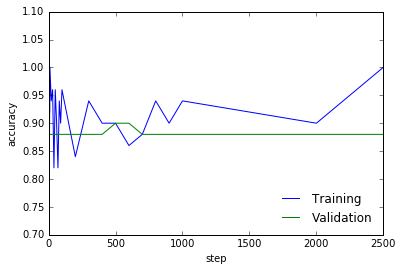

In [76]:
# check final accuracy on validation set  
if(VALIDATION_SIZE):
    validation_accuracy = accuracy.eval(feed_dict={x: validation_images, 
                                                   y_: validation_labels, 
                                                   keep_prob: 1.0})
    print('validation_accuracy => %.4f'%validation_accuracy)
    plt.plot(x_range, train_accuracies,'-b', label='Training')
    plt.plot(x_range, validation_accuracies,'-g', label='Validation')
    plt.legend(loc='lower right', frameon=False)
    plt.ylim(ymax = 1.1, ymin = 0.7)
    plt.ylabel('accuracy')
    plt.xlabel('step')
    plt.show()

In [77]:
print(accuracy.eval(feed_dict={x: train_images, y_: train_labels}))

0.920075


# Some Manual Testing

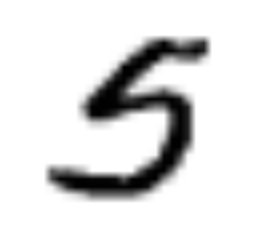

In [93]:
display(train_images[IMAGE_TO_DISPLAY])

In [97]:
train_labels[IMAGE_TO_DISPLAY]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=uint8)

In [100]:
predict.eval(feed_dict={x: train_images[IMAGE_TO_DISPLAY:IMAGE_TO_DISPLAY+1],keep_prob: 1.0})

array([5])

In [102]:
feed_dict = {x: train_images[IMAGE_TO_DISPLAY:IMAGE_TO_DISPLAY+1], keep_prob:1.0}
y.eval(feed_dict)

array([[  3.14105824e-02,   2.40785721e-06,   9.05170091e-05,
          4.03044187e-02,   1.02026010e-04,   9.21309948e-01,
          5.51455363e-04,   6.51119553e-05,   5.99920982e-03,
          1.64415658e-04]], dtype=float32)

# Build a Multilayer Convolutional Network  
*ConvNet architectures make the explicit assumption that the inputs are images, which allows us to encode certain properties into the architecture. Regular Neural Nets don’t scale well to full images and also they dont take the spatial structure of images into account very well.*

<img src="https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-07-at-4-59-29-pm.png?w=1496", width=600, height=600> 


**Convolution**: is a complex step whereby features are extracted from the image,back-propogation allows for identification of important features.<br/><br/>
ConvNets derive their name from the “convolution” operator. The primary purpose of Convolution in case of a ConvNet is to extract features from the input image. Convolution preserves the spatial relationship between pixels by learning image features using small squares of input data. We will not go into the mathematical details of Convolution here, but will try to understand how it works .<br/><br/>
In CNN terminology, matrixs (5x5) are used as ‘filters‘ or ‘kernels’ or ‘feature detectors’ and the matrix formed by sliding the filter over the image and computing the dot product is called the ‘Convolved Feature’ or ‘Activation Map’ or the ‘Feature Map‘. It is important to note that filters acts as feature detectors from the original input image.<br/><br/>
Filters can perform operations such as Edge Detection, Sharpen and Blur just by changing the numeric values of our filter matrix before the convolution operation, this means that different filters can detect different features from an image, for example edges, curves etc. <br/><br/>
In practice, a CNN learns the values of these filters on its own during the training process (although we still need to specify parameters such as number of filters, filter size, architecture of the network etc. before the training process). The more number of filters we have, the more image features get extracted and the better our network becomes at recognizing patterns in unseen images.


**ReLu** Neuron activations function. The rectifier activation function is used instead of a linear activation function to add non linearity to the network, otherwise the network would only ever be able to compute a linear function. ReLu was found to greatly **accelerate the convergence of stochastic gradient descent**   <br/><br/>
**Pooling**:Pooling: reduces dimensionality, Pooling is used for downsampling of the data. 2x2 max-pooling splits the image into square 2-pixel blocks and only keeps maximum value for each of those blocks. http://cs231n.github.io/convolutional-networks/#pool  <br/><br/>
**Dropout**: Is a technique employed to reduce over-fitting, nodes are turned off at random and the effect measure. The idea is to reduce node reliability on certain features and improve overall network nodes.It essentially forces an artificial neural network to learn multiple independent representations of the same data by alternately randomly disabling neurons in the learning phase. <br/><br/>
**Fully Connected Layer**: The Fully Connected layer is a traditional Multi Layer Perceptron that uses a softmax activation function in the output layer (other classifiers like SVM can also be used, but will stick to softmax in this post).<br/><br/>
The output from the convolutional and pooling layers represent high-level features of the input image. The purpose of the Fully Connected layer is to use these features for classifying the input image into various classes based on the training dataset.

In [13]:
# weight initialization
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

# convolution
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

# pooling
# [[0,3],
#  [4,2]] => 4

# [[0,1],
#  [1,1]] => 1

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

### First Convolutional Layer
The first layer is a convolution, followed by max pooling. The convolution computes 32 features for each 5x5 patch. Its weight tensor has a shape of [5, 5, 1, 32].<br/>
The first two dimensions are the patch size, the next is the number of input channels (1 means that images are grayscale), and the last is the number of output channels
There is also a bias vector with a component for each output channel.  
To apply the layer, we reshape the input data to a 4d tensor, with the first dimension corresponding to the number of images, second and third - to image width and height, and the final dimension - to the number of colour channels.
After the convolution, pooling reduces the size of the output from 28x28 to 14x14.



In [21]:
# first convolutional layer
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

# (40000,784) => (40000,28,28,1)
image = tf.reshape(x, [-1,image_width , image_height,1])
#print (image.get_shape()) # =>(40000,28,28,1)


h_conv1 = tf.nn.relu(conv2d(image, W_conv1) + b_conv1)
#print (h_conv1.get_shape()) # => (40000, 28, 28, 32)
h_pool1 = max_pool_2x2(h_conv1)
#print (h_pool1.get_shape()) # => (40000, 14, 14, 32)
###########################
###########################
###########################
# Prepare for visualization
# display 32 fetures in 4 by 8 grid
layer1 = tf.reshape(h_conv1, (-1, image_height, image_width, 4 ,8))  

# reorder so the channels are in the first dimension, x and y follow.
layer1 = tf.transpose(layer1, (0, 3, 1, 4,2))

layer1 = tf.reshape(layer1, (-1, image_height*4, image_width*8)) 

In CNN terminology, the 3×3 matrix is called a ‘filter‘ or ‘kernel’ or ‘feature detector’ and the matrix formed by sliding the filter over the image and computing the dot product is called the ‘Convolved Feature’ or ‘Activation Map’ or the ‘Feature Map‘. It is important to note that filters acts as feature detectors from the original input image.

In [22]:
#sess.close()
# start TensorFlow session
init = tf.initialize_all_variables()
sess = tf.InteractiveSession()

sess.run(init)

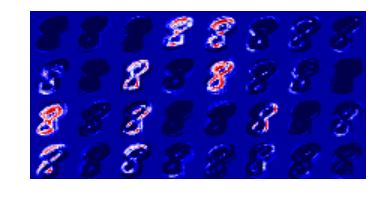

In [23]:
layer1_grid = layer1.eval(feed_dict={x: images[IMAGE_TO_DISPLAY:IMAGE_TO_DISPLAY+1], keep_prob: 1.0})
plt.axis('off')
plt.imshow(layer1_grid[0], cmap=cm.seismic )

### Second Convolutional Layer

The second layer has 64 features for each 5x5 patch. Its weight tensor has a shape of [5, 5, 32, 64]. The first two dimensions are the patch size, the next is the number of input channels (32 channels correspond to 32 featured that we got from previous convolutional layer), and the last is the number of output channels. There is also a bias vector with a component for each output channel.  
Because the image is down-sampled by pooling to 14x14 size second convolutional layer picks up more general characteristics of the images. Filters cover more space of the picture. Therefore, it is adjusted for more generic features while the first layer finds smaller details.

In [24]:
# second convolutional layer
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
#print (h_conv2.get_shape()) # => (40000, 14,14, 64)
h_pool2 = max_pool_2x2(h_conv2)
#print (h_pool2.get_shape()) # => (40000, 7, 7, 64)
###########################
###########################
###########################
# Prepare for visualization
# display 64 fetures in 4 by 16 grid
layer2 = tf.reshape(h_conv2, (-1, 14, 14, 4 ,16))  

# reorder so the channels are in the first dimension, x and y follow.
layer2 = tf.transpose(layer2, (0, 3, 1, 4,2))

layer2 = tf.reshape(layer2, (-1, 14*4, 14*16)) 

In [25]:
sess.close()
# start TensorFlow session
init = tf.initialize_all_variables()
sess = tf.InteractiveSession()

sess.run(init)

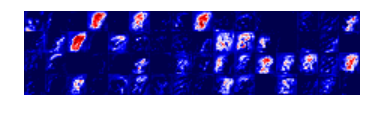

In [26]:
layer1_grid = layer2.eval(feed_dict={x: images[IMAGE_TO_DISPLAY:IMAGE_TO_DISPLAY+1], keep_prob: 1.0})
plt.axis('off')
plt.imshow(layer1_grid[0], cmap=cm.seismic )


Now that the image size is reduced to 7x7, we add a fully-connected layer with 1024 neurones to allow processing on the entire image (each of the neurons of the fully connected layer is connected to all the activations/outpus of the previous layer)

In [27]:
# densely connected layer
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

# (40000, 7, 7, 64) => (40000, 3136)
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])

h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
#print (h_fc1.get_shape()) # => (40000, 1024)

In [28]:
# dropout
keep_prob = tf.placeholder('float')
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [29]:
# readout layer for deep net
W_fc2 = weight_variable([1024, labels_count])
b_fc2 = bias_variable([labels_count])

y = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

#print (y.get_shape()) # => (40000, 10)

In [30]:
# cost function
cross_entropy = -tf.reduce_sum(y_*tf.log(y))


# optimisation function
train_step = tf.train.AdamOptimizer(LEARNING_RATE).minimize(cross_entropy)

# evaluation
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

In [31]:
# prediction function
#[0.1, 0.9, 0.2, 0.1, 0.1 0.3, 0.5, 0.1, 0.2, 0.3] => 1
predict = tf.argmax(y,1)

In [32]:
sess.close()
# start TensorFlow session
init = tf.initialize_all_variables()
sess = tf.InteractiveSession()
sess.run(init)

In [33]:
# visualisation variables
train_accuracies = []
validation_accuracies = []
x_range = []

display_step=1

for i in range(TRAINING_ITERATIONS):

    #get new batch
    batch_xs, batch_ys = next_batch(BATCH_SIZE)        

    # check progress on every 1st,2nd,...,10th,20th,...,100th... step
    if i%display_step == 0 or (i+1) == TRAINING_ITERATIONS:
        
        train_accuracy = accuracy.eval(feed_dict={x:batch_xs, 
                                                  y_: batch_ys, 
                                                  keep_prob: 1.0})       
        if(VALIDATION_SIZE):
            validation_accuracy = accuracy.eval(feed_dict={ x: validation_images[0:BATCH_SIZE], 
                                                            y_: validation_labels[0:BATCH_SIZE], 
                                                            keep_prob: 1.0})                                  
            print('training_accuracy / validation_accuracy => %.2f / %.2f for step %d'%(train_accuracy, validation_accuracy, i))
            
            validation_accuracies.append(validation_accuracy)
            
        else:
             print('training_accuracy => %.4f for step %d'%(train_accuracy, i))
        train_accuracies.append(train_accuracy)
        x_range.append(i)
        
        # increase display_step
        if i%(display_step*10) == 0 and i:
            display_step *= 10
    # train on batch
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys, keep_prob: DROPOUT})

training_accuracy / validation_accuracy => 0.02 / 0.14 for step 0
training_accuracy / validation_accuracy => 0.02 / 0.14 for step 1
training_accuracy / validation_accuracy => 0.06 / 0.14 for step 2
training_accuracy / validation_accuracy => 0.14 / 0.14 for step 3
training_accuracy / validation_accuracy => 0.08 / 0.14 for step 4
training_accuracy / validation_accuracy => 0.14 / 0.12 for step 5
training_accuracy / validation_accuracy => 0.20 / 0.22 for step 6
training_accuracy / validation_accuracy => 0.20 / 0.26 for step 7
training_accuracy / validation_accuracy => 0.16 / 0.28 for step 8
training_accuracy / validation_accuracy => 0.22 / 0.30 for step 9
training_accuracy / validation_accuracy => 0.22 / 0.32 for step 10
training_accuracy / validation_accuracy => 0.44 / 0.54 for step 20
training_accuracy / validation_accuracy => 0.46 / 0.64 for step 30
training_accuracy / validation_accuracy => 0.72 / 0.70 for step 40
training_accuracy / validation_accuracy => 0.62 / 0.78 for step 50
train

validation_accuracy => 0.9820


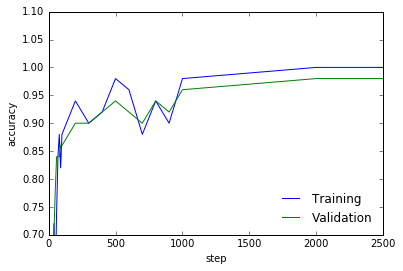

In [34]:
# check final accuracy on validation set  
if(VALIDATION_SIZE):
    validation_accuracy = accuracy.eval(feed_dict={x: validation_images, 
                                                   y_: validation_labels, 
                                                   keep_prob: 1.0})
    print('validation_accuracy => %.4f'%validation_accuracy)
    plt.plot(x_range, train_accuracies,'-b', label='Training')
    plt.plot(x_range, validation_accuracies,'-g', label='Validation')
    plt.legend(loc='lower right', frameon=False)
    plt.ylim(ymax = 1.1, ymin = 0.7)
    plt.ylabel('accuracy')
    plt.xlabel('step')
    plt.show()

# Test it Out

test_images(28000,784)
predicted_lables(28000)
predicted_lables[10] => 5.0


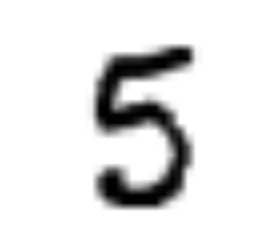

In [50]:
# read test data from CSV file 
test_images = pd.read_csv('test.csv').values
test_images = test_images.astype(np.float)

# convert from [0:255] => [0.0:1.0]
test_images = np.multiply(test_images, 1.0 / 255.0)

print('test_images({0[0]},{0[1]})'.format(test_images.shape))


# predict test set
#predicted_lables = predict.eval(feed_dict={x: test_images, keep_prob: 1.0})

# using batches is more resource efficient
predicted_lables = np.zeros(test_images.shape[0])
for i in range(0,test_images.shape[0]//BATCH_SIZE):
    predicted_lables[i*BATCH_SIZE : (i+1)*BATCH_SIZE] = predict.eval(feed_dict={x: test_images[i*BATCH_SIZE : (i+1)*BATCH_SIZE], 
                                                                                keep_prob: 1.0})


print('predicted_lables({0})'.format(len(predicted_lables)))

# output test image and prediction
display(test_images[IMAGE_TO_DISPLAY])
print ('predicted_lables[{0}] => {1}'.format(IMAGE_TO_DISPLAY,predicted_lables[IMAGE_TO_DISPLAY]))

# save results
np.savetxt('submission_softmax.csv', 
           np.c_[range(1,len(test_images)+1),predicted_lables], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')

In [53]:
np.zeros(t_images.shape[0])

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

# What's next?<br/>
# Applying it to Cucumbers of course<br/>
https://cloud.google.com/blog/big-data/2016/08/how-a-japanese-cucumber-farmer-is-using-deep-learning-and-tensorflow

## Want to know more about Convolutional Neural Networks??<br/>
https://www.tensorflow.org/versions/r0.10/tutorials/deep_cnn/index.html